<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/logo.png" width="300" alt="cognitiveclass.ai logo" />
</center>


# Build a Dashboard Application with Plotly Dash
In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in real-time.

This dashboard application contains input components such as a dropdown list and a range slider to interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:

- TASK 1: Add a Launch Site Drop-down Input Component

- TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown

- TASK 3: Add a Range Slider to Select Payload

- TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot

**Note:Please take screenshots of the Dashboard and save them. Further upload your notebook to github.**

**The github url and the screenshots are later required in the presentation slides**

Your completed dashboard application should look like the following screenshot:

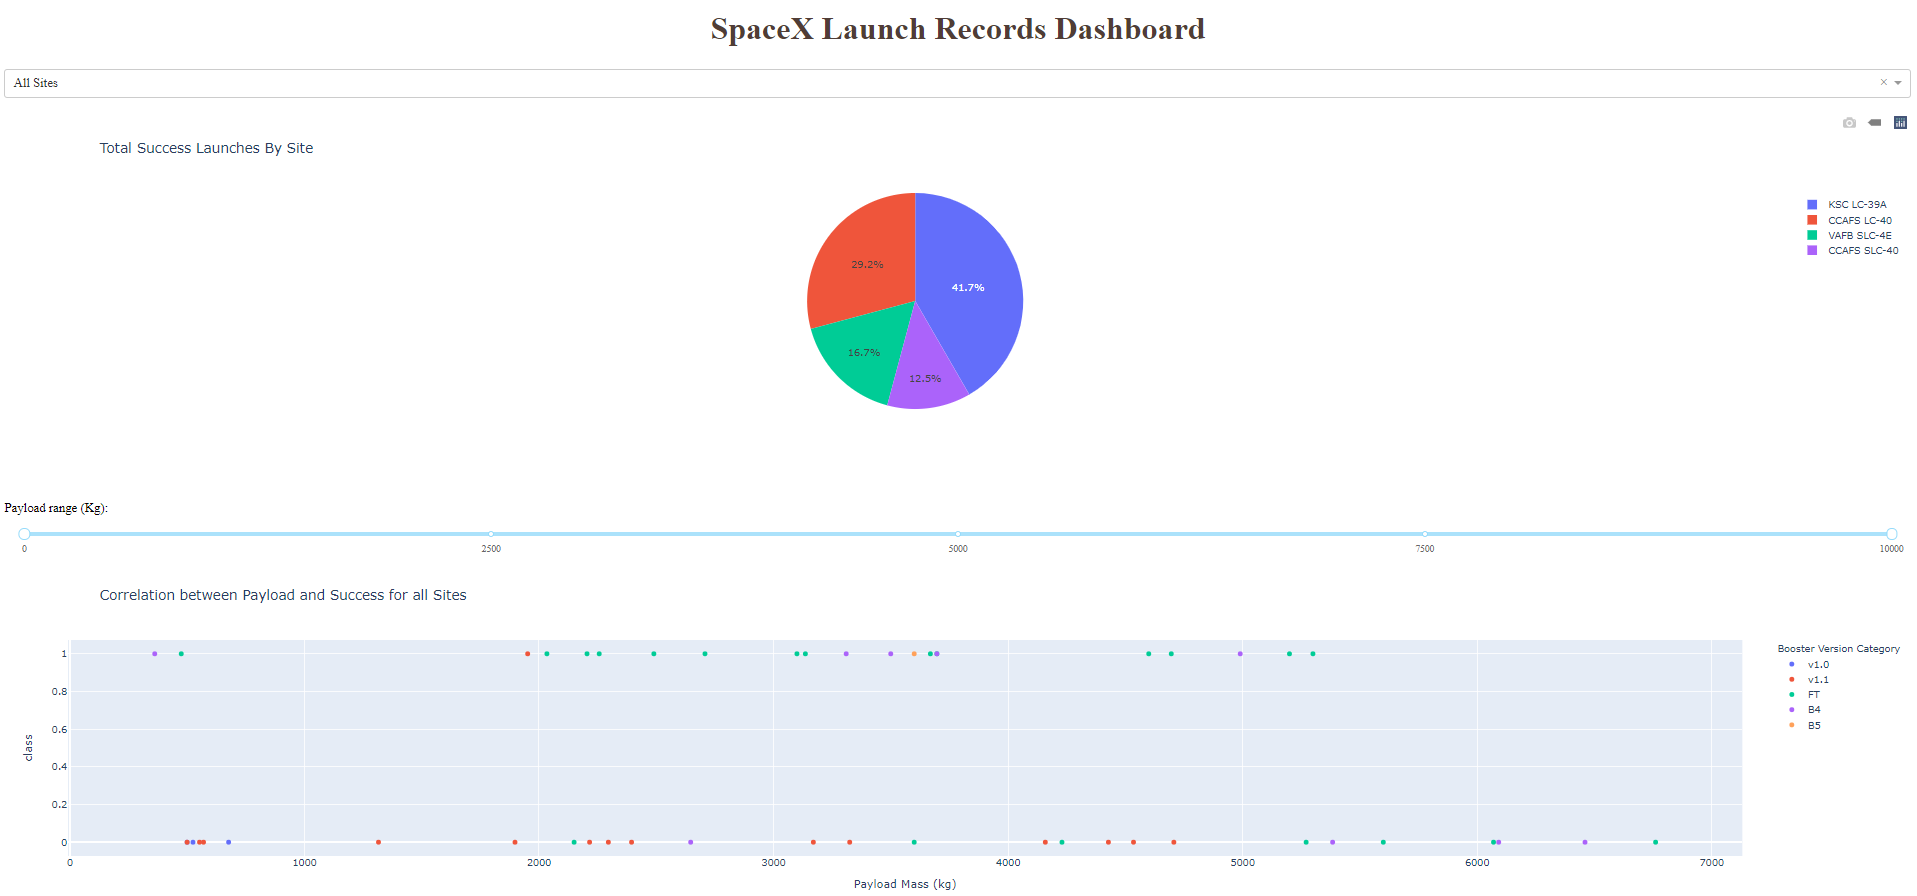

After visual analysis using the dashboard, you should be able to obtain some insights to answer the following five questions:

- Which site has the largest successful launches?
- Which site has the highest launch success rate?
- Which payload range(s) has the highest launch success rate?
- Which payload range(s) has the lowest launch success rate?
- Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?

Estimated time needed: 90 minutes


## TASK 1: Add a Launch Site Drop-down Input Component

We have four different launch sites and we would like to first see which one has the largest success count. Then, we would like to select one specific site and check its detailed success rate (class=0 vs. class=1).

As such, we will need a dropdown menu to let us select different launch sites.

- Find and complete a commented `dcc.Dropdown(id='site-dropdown',...)` input with following attributes:
    - `id` attribute with value `site-dropdown`
    - `options` attribute is a list of dict-like option objects (with `label` and `value` attributes). You can set the label and value all to be the launch site names in the `spacex_df` and you need to include the default `All` option. e.g.,
    
  `options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'site1', 'value': 'site1'}, ...]`
  
    -  `value` attribute with default dropdown value to be `ALL` meaning all sites are selected
    - `placeholder` attribute to show a text description about this input area, such as `Select a Launch Site here`
    - `searchable` attribute to be True so we can enter keywords to search launch sites
    
Here is an example of `dcc.Dropdown`:

dcc.Dropdown(id='id',

                options=[
                
                    {'label': 'All Sites', 'value': 'ALL'},
                    
                    {'label': 'site1', 'value': 'site1'},
                    
                ],
                
                value='ALL',
                
                placeholder="place holder here",
                
                searchable=True
                
                ),

If you need more help about `Dropdown()`, refer to the `Plotly Dash Reference` section towards the end of this lab.

Your completed dropdown menu should look like the following screenshot:

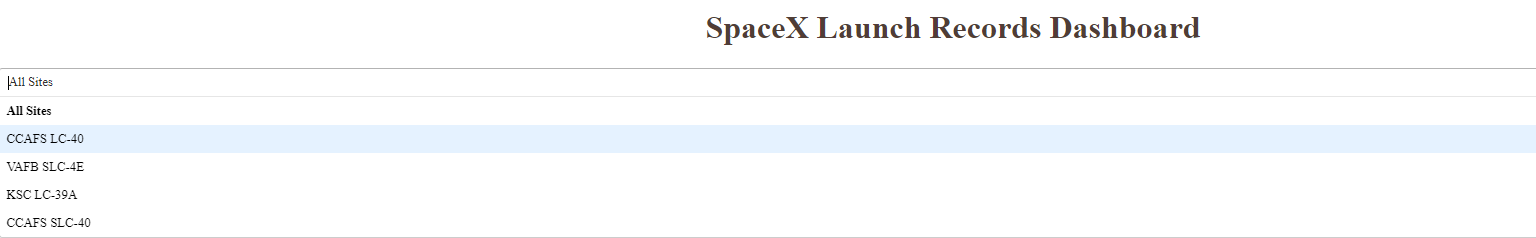


## TASK 2: Add a callback function to render `success-pie-chart` based on selected site dropdown

The general idea of this callback function is to get the selected launch site from `site-dropdown` and render a pie chart visualizing launch success counts.

Dash callback function is a type of Python function which will be automatically called by Dash whenever receiving an input component updates, such as a click or dropdown selecting event.

If you need to refresh your memory about Plotly Dash callback functions, you may refer to the lab you have learned before:

[Plotly Dash Lab]https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/4.7_Dash_Interactivity.py

Let's add a callback function in `spacex_dash_app.py` including the following application logic:

- Input is set to be the `site-dropdown` dropdown, i.e., `Input(component_id='site-dropdown', component_property='value')`
- Output to be the graph with id `success-pie-chart`, i.e., `Output(component_id='success-pie-chart', component_property='figure')
- A `If-Else` statement to check if ALL sites were selected or just a specific launch site was selected
    - If ALL sites are selected, we will use all rows in the dataframe `spacex_df` to render and return a pie chart graph to show the total success launches (i.e., the total count of `class` column)
    - If a specific launch site is selected, you need to filter the dataframe `spacex_df` first in order
to include the only data for the selected site. Then, render and return a pie chart graph to show the success (`class=1`) count and failed (`class=0`) count for the selected site.
Here is an example of a callback function:

#### Function decorator to specify function input and output

@app.callback(Output(component_id='success-pie-chart',

component_property='figure'),

              Input(component_id='site-dropdown', component_property='value'))
              
def get_pie_chart(entered_site):

    filtered_df = spacex_df
    
    if entered_site == 'ALL':
    
        fig = px.pie(data, values='class', 
        
        names='pie chart names', 
        
        title='title')
        
        return fig
        
    else:
    
        # return the outcomes piechart for a selected site
        
The rendered pie chart should look like the following screenshots:

- Pie chart for all sites are selected
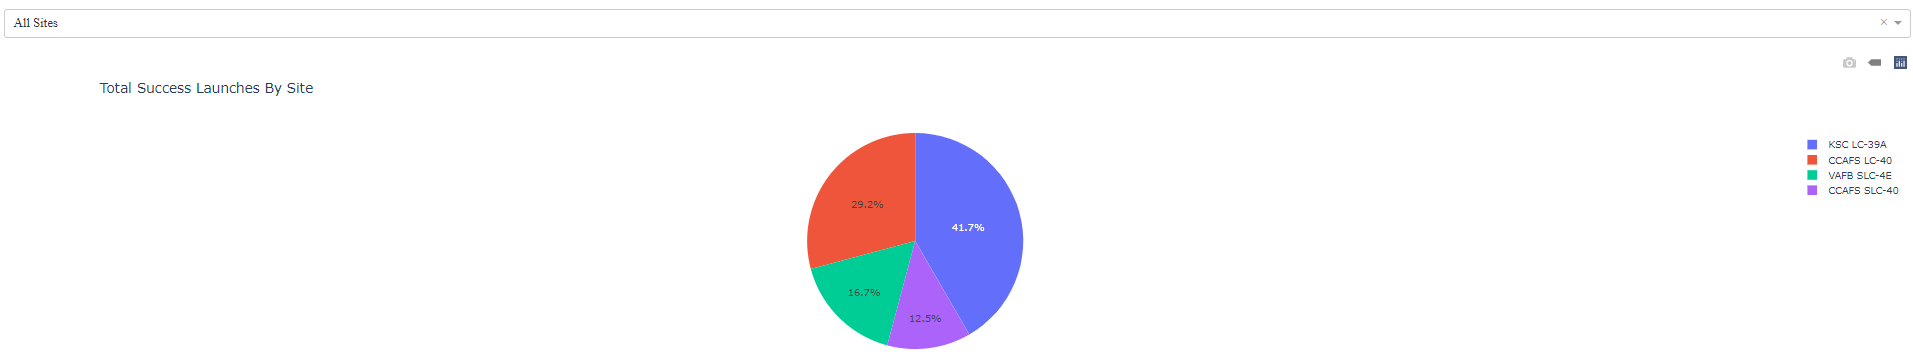

- Pie chart for is selected
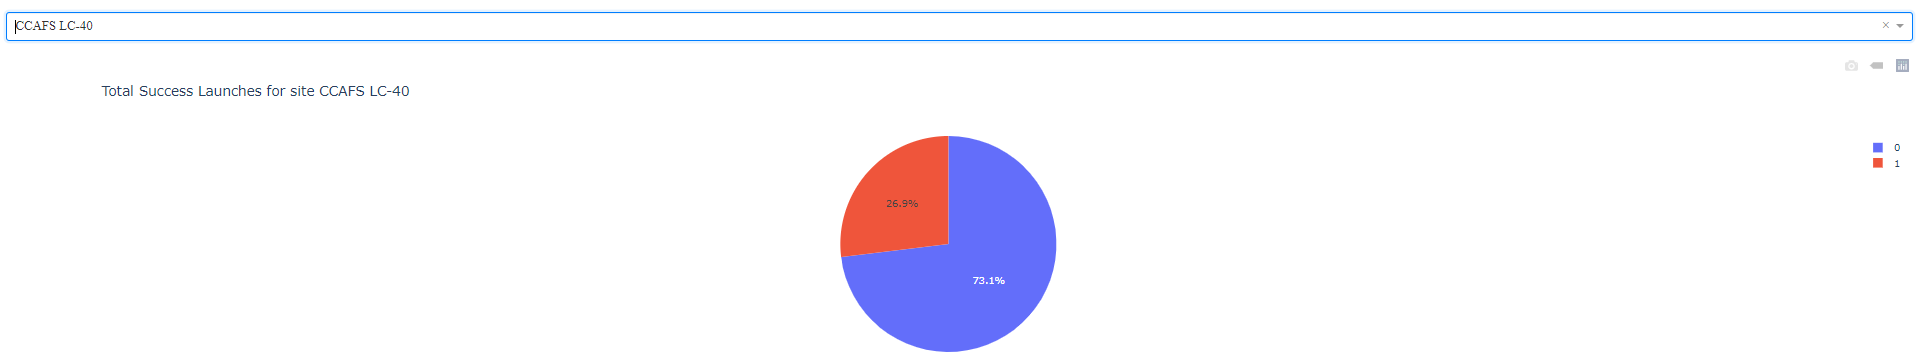

If you need more reference about dash callbacks and plotly pie charts, refer to the Plotly Dash Reference section towards the end of this lab.

## TASK 3: Add a Range Slider to Select Payload
Next, we want to find if variable payload is correlated to mission outcome. From a dashboard point of view, we want to be able to easily select different payload range and see if we can identify some visual patterns.

Find and complete a commented `dcc.RangeSlider(id='payload-slider',...)` input with the following attribute:

- `id` to be `payload-slider`
- `min` indicating the slider starting point, we set its value to be 0 (Kg)
- `max` indicating the slider ending point to, we set its value to be 10000 (Kg)
- `step` indicating the slider interval on the slider, we set its value to be 1000 (Kg)
- `value` indicating the current selected range, we could set it to be `min_payload` and `max_payload`

Here is an example of `RangeSlider`:

dcc.RangeSlider(id='id',

                min=0, max=10000, step=1000,
                
                marks={0: '0',
                
                       100: '100'},
                       
                value=[min_value, max_value])
                
You completed payload range slider should be similar the following screenshot: 
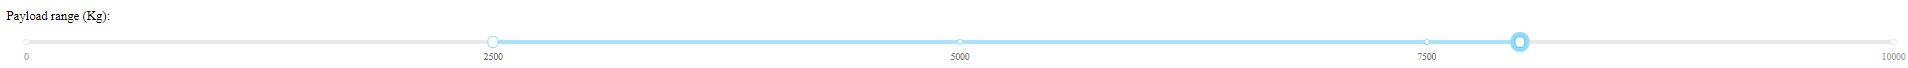

If you need more reference about range slider, refer to the `Plotly Dash Reference` towards the end of this lab.


## TASK 4: Add a callback function to render the `success-payload-scatter-chart` scatter plot
Next, we want to plot a scatter plot with the x axis to be the payload and the y axis to be the launch outcome (i.e., class column). As such, we can visually observe how payload may be correlated with mission outcomes for selected site(s).

In addition, we want to color-label the Booster version on each scatter point so that we may observe mission outcomes with different boosters.

Now, let's add a call function including the following application logic:

- Input to be `[Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")]` Note that we have two input components, one to receive selected launch site and another to receive selected payload range
- Output to be `Output(component_id='success-payload-scatter-chart', component_property='figure')`
- A `If-Else` statement to check if ALL sites were selected or just a specific launch site was selected
    - If ALL sites are selected, render a scatter plot to display all values for variable `Payload Mass (kg)` and variable `class`.
    In addition, the point color needs to be set to the booster version i.e., `color="Booster Version Category"`
        - If a specific launch site is selected, you need to filter the `spacex_df` first, and render a scatter chart to show
    values `Payload Mass (kg)` and `class` for the selected site, and color-label the point using `Boosster Version Category` likewise.
    
You rendered scatter point should look like the following screenshot: 
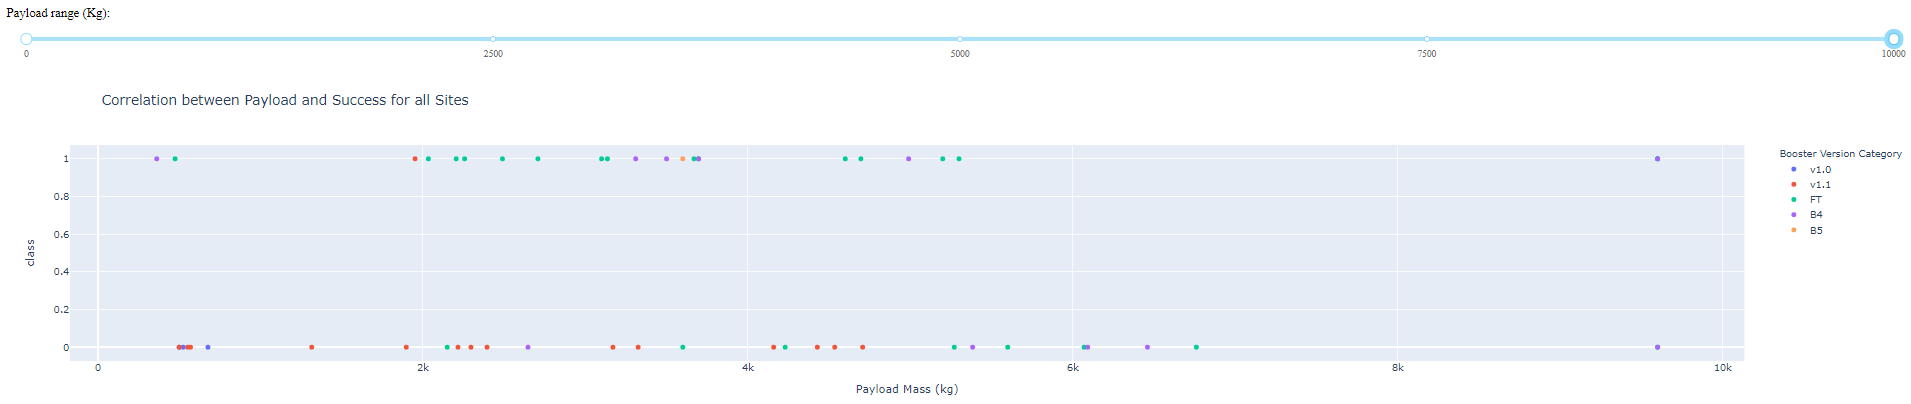

If you need more reference about dash callbacks and plotly scatter plots, refer to the `Plotly Dash Reference` towards the end of this lab.

# Finding Insights Visually
Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

1. Which site has the largest successful launches?
2. Which site has the highest launch success rate?
3. Which payload range(s) has the highest launch success rate?
4. Which payload range(s) has the lowest launch success rate?
5. Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest launch success rate?


# Plotly Dash Reference
## Dropdown (input) component
Refer [here](https://dash.plotly.com/dash-core-components/dropdown?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01) for more details about dcc.Dropdown()

## Range slider (input) component
Refer [here](https://dash.plotly.com/dash-core-components/rangeslider?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01) for more details about dcc.RangeSlider()

## Pie chart (output) component
Refer [here](https://plotly.com/python/pie-charts/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01) for more details about plotly pie charts

## Scatter chart (output) component
Refer [here](https://plotly.com/python/line-and-scatter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01) for more details about plotly scatter charts

## Application


In [16]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update


# Create a dash application
app = JupyterDash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read the Space X Launch data into pandas dataframe
spacex_df =  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv") 

# For Task 3 dcc.RangeSlider
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Application layout
app.layout = html.Div(children=[# TODO1: Add title to the dashboard
                                html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}
                                       ),
                                # TASK 1: Add a Launch Site Drop-down Input Component
                                dcc.Dropdown(id='site-dropdown', 
                                             options=[
                                                 {'label': 'All Sites', 'value': 'ALL'},
                                                 {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}],                
                                             value='ALL',
                                             placeholder="Select a Launch Site here",
                                             searchable=True
                                            ),
                                html.Br(), 
                                
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),
    
                                html.P('Payload range (kg):'), 
                                # TASK 3: Add a Range Slider to Select Payload
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0',
                                                       100: '100'},
                                                value=[min_payload, max_payload]
                                               ),
                                
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')
                                        ),
                                ])
    
# TASK 2: Add a callback function to render success-pie-chart based on selected site dropdown
# Function decorator to specify function input and output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(site_dropdown):
    filtered_pie_df = spacex_df
    if site_dropdown == 'ALL':
        piechart1 = px.pie(filtered_pie_df, names='Launch Site',
                          title='Total Launch Records for All Sites')
        return piechart1
    else:
        piechart2 = px.pie(filtered_pie_df, names='class',
                         title='Total Launch Records for a Specific Site')
        return piechart2



#TASK 4: Add a callback function to render the success-payload-scatter-chart scatter plot
# Function decorator to specify function input and output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')
    ])
def getscatter(entered_site,payload):
    filtered_df = spacex_df
    
    if entered_site == 'ALL':
        scatterplot1 = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Success count on Payload mass for all sites'
                        ) 
        return scatterplot1
    else:
        scatterplot2 = px.scatter(filtered_df[filtered_df['Launch Site']==entered_site], 
                         x='Payload Mass (kg)', y='class',
                         color='Booster Version Category',
                         title='Success count on Payload mass for site {entered_site}'
                        )
        return scatterplot2

# Run the app
if __name__ == '__main__':
    
# Adding dev_tools_ui=False, dev_tools_props_check=False can prevent error appearing before calling callback function
    app.run_server(mode="inline", host="localhost", debug=False, dev_tools_ui=False, dev_tools_props_check=False)

 * Running on http://localhost:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jun/2022 14:50:33] "GET /_alive_645243ff-44bb-4a42-84a8-4160141d88d4 HTTP/1.1" 200 -


127.0.0.1 - - [04/Jun/2022 14:50:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:34] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:34] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2022 14:50:35] "POST /_dash-update-component HTTP/1.1" 200 -


## Summary

Congratulations for completing your dash and plotly assignment.

More information about the libraries can be found [here](https://dash.plotly.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)


## Author

[Saishruthi Swaminathan](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)


## Changelog

| Date       | Version | Changed by | Change Description                   |
| ---------- | ------- | ---------- | ------------------------------------ |
| 12-18-2020 | 1.0     | Nayef      | Added dataset link and upload to Git |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
